                           name  \
0           La Grande Boucherie   
1                    The Modern   
2                STK Steakhouse   
3              Tony's Di Napoli   
4  La Pecora Bianca Bryant Park   

                                            address  rating  price_level  \
0  145 W 53rd St, New York, NY 10019, United States     4.6          2.0   
1    9 W 53rd St, New York, NY 10019, United States     4.6          4.0   
2   1114 6th Ave, New York, NY 10036, United States     4.8          3.0   
3  147 W 43rd St, New York, NY 10036, United States     4.6          2.0   
4   20 W 40th St, New York, NY 10018, United States     4.7          3.0   

    latitude  longitude  source  
0  40.762634 -73.980836  google  
1  40.761081 -73.976753  google  
2  40.754721 -73.982759  google  
3  40.756462 -73.985397  google  
4  40.752518 -73.983153  google  
Top cities by average rating:
city
NY     4.503750
IL     4.490833
CA     4.452500
MA     4.437500
NJ          NaN
Name: rating,

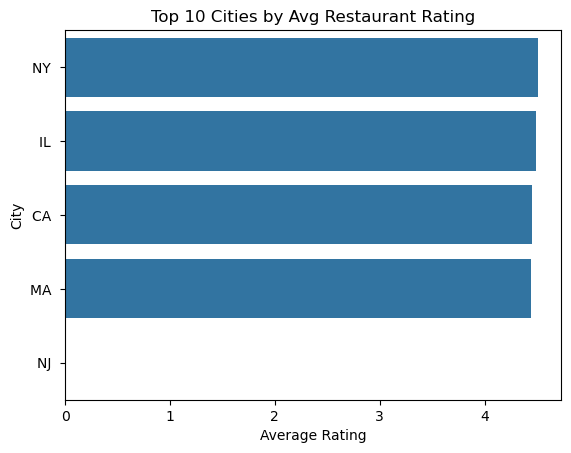

Price level distribution per city:
price_level  1.0  2.0  3.0  4.0
city                           
CA            60  254   81   24
IL            26  156   23   11
MA            27  138   46    7
NY             7  161   34   13


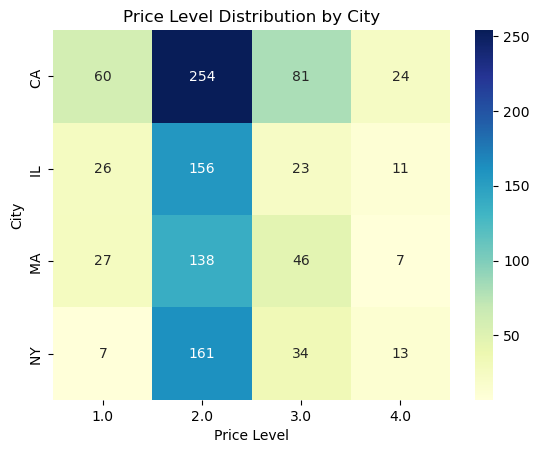

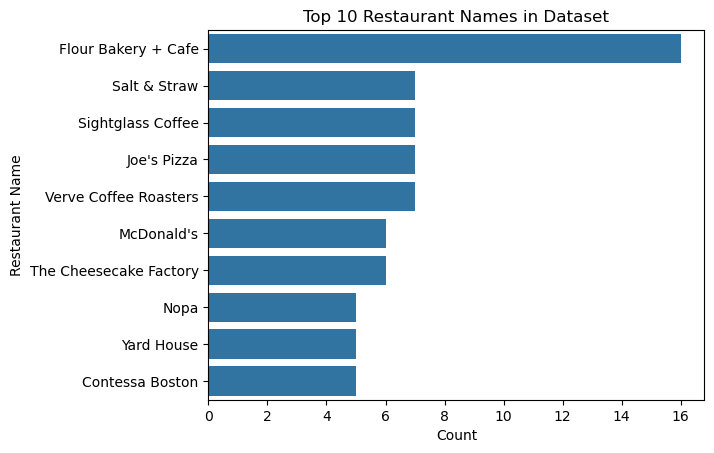

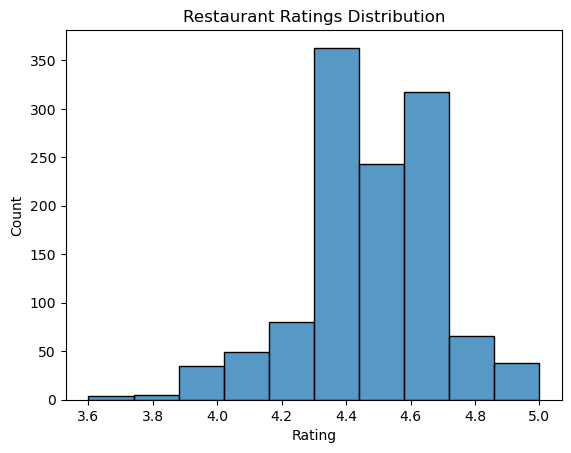

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your combined cleaned dataset
df = pd.read_csv("combined_restaurants_cleaned.csv")
print(df.head())

# Convert rating and price_level to numeric, in case they aren't
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['price_level'] = pd.to_numeric(df['price_level'], errors='coerce')

# Extract city from address (this works for US-style addresses)
df['city'] = df['address'].str.extract(r',\s*(\w+\s?\w*)\s*\d{5}')

# --- A. Cities with the highest average restaurant ratings ---
avg_ratings = df.groupby('city')['rating'].mean().sort_values(ascending=False)
print("Top cities by average rating:")
print(avg_ratings.head(10))

# Plot top 10 cities by average rating
top_cities = avg_ratings.head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Avg Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

# --- B. Price level distribution per city ---
price_dist = df.groupby('city')['price_level'].value_counts().unstack().fillna(0)
print("Price level distribution per city:")
print(price_dist)

# Plot price distribution as a heatmap
sns.heatmap(price_dist, cmap="YlGnBu", annot=True, fmt='g')
plt.title('Price Level Distribution by City')
plt.xlabel('Price Level')
plt.ylabel('City')
plt.show()

# --- C. Top restaurant names (as a proxy for types if no category field exists) ---
top_names = df['name'].value_counts().head(10)
sns.barplot(x=top_names.values, y=top_names.index)
plt.title('Top 10 Restaurant Names in Dataset')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.show()

# --- D. Ratings histogram ---
sns.histplot(df['rating'].dropna(), bins=10)
plt.title('Restaurant Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [5]:
# 1. Check how many entries exist for NJ
print("Total NJ entries:", df[df['state'] == 'NJ'].shape[0])

# 2. Check how many NJ entries have valid (non-null) ratings
valid_nj_ratings = df[(df['state'] == 'NJ') & (df['rating'].notnull())]
print("NJ entries with valid ratings:", valid_nj_ratings.shape[0])

# 3. Preview NJ entries
print("Preview of NJ entries:")
print(df[df['state'] == 'NJ'].head())



KeyError: 'state'

In [7]:
print(df.columns)


Index(['name', 'address', 'rating', 'price_level', 'latitude', 'longitude',
       'source', 'city'],
      dtype='object')


In [9]:
# Extract state abbreviation from the address
df['state'] = df['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}')


In [11]:
print(df[['address', 'state']].head())


                                            address state
0  145 W 53rd St, New York, NY 10019, United States    NY
1    9 W 53rd St, New York, NY 10019, United States    NY
2   1114 6th Ave, New York, NY 10036, United States    NY
3  147 W 43rd St, New York, NY 10036, United States    NY
4   20 W 40th St, New York, NY 10018, United States    NY


In [13]:
# 1. Total NJ entries
print("Total NJ entries:", df[df['state'] == 'NJ'].shape[0])

# 2. NJ entries with valid ratings
print("Valid NJ ratings:", df[(df['state'] == 'NJ') & (df['rating'].notnull())].shape[0])

# 3. Preview NJ entries
print(df[df['state'] == 'NJ'].head())



Total NJ entries: 1
Valid NJ ratings: 0
               name                                        address  rating  \
1249  Ed And Mary's  174 Coles St (9th St.), Jersey City, NJ 07302     NaN   

      price_level   latitude  longitude      source city state  
1249          NaN  40.728631 -74.046367  foursquare  NJ     NJ  
